# Finance Data Project 


____


## Get the Data

* using pandas to directly read data from Google finance using pandas!

First we start with the proper imports, which we've already laid out for you here.


### The Imports


In [1]:
import seaborn as sns

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

Getting data using pandas datareader. 
Getting stock information for the following stock-market index (in Asia):
* JCI
* KLCI
* NZ50
* SHC
* STI
* TWSE


In [3]:
start = '2006-01-01'
end = '2016-01-01'

In [4]:
JCI = data.DataReader("^JCI", 'stooq', start, end)
KLCI = data.DataReader("^KLCI", 'stooq', start, end)
NZ50 = data.DataReader("^NZ50", 'stooq', start, end)
SHC = data.DataReader("^SHC", 'stooq', start, end)
STI = data.DataReader("^STI", 'stooq', start, end)
TWSE = data.DataReader("^TWSE", 'stooq', start, end)



In [5]:
TWSE

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,8273.77,8338.06,8258.73,8338.06,1.199528e+09
2015-12-30,8313.37,8342.34,8262.52,8279.99,1.308249e+09
2015-12-29,8313.37,8342.34,8268.81,8274.69,1.196770e+09
2015-12-28,8374.18,8394.60,8358.49,8358.49,1.295105e+09
2015-12-25,8328.94,8364.30,8320.10,8363.28,1.243689e+09
...,...,...,...,...,...
2006-01-06,6757.41,6761.01,6676.65,6694.82,4.864665e+09
2006-01-05,6669.80,6717.12,6666.84,6709.87,4.901373e+09
2006-01-04,6658.32,6670.96,6579.66,6616.44,4.987459e+09


**Creating a list of the ticker symbols (as strings) in alphabetical order.**

In [6]:
tickers = ['JCI','KLCI','NZ50','SHC','STI','TWSE']

**Using pd.concat to concatenate the stock-market index dataframes together to a single data frame called stock_market**

In [7]:
stock_market = pd.concat([JCI,KLCI,NZ50,SHC,STI,TWSE],keys=tickers,axis=1)
stock_market

JCI                                KLCI                    \
               Open     High      Low    Close     Open     High      Low   
Date                                                                        
2006-01-02  1161.78  1171.71  1161.30  1171.71      NaN      NaN      NaN   
2006-01-03  1170.09  1186.46  1170.09  1184.69   899.18   899.85   891.04   
2006-01-04  1188.25  1211.70  1188.25  1211.70   893.09   897.88   892.63   
2006-01-05  1213.15  1221.17  1204.96  1211.00   897.34   908.71   897.34   
2006-01-06  1210.22  1225.00  1205.74  1222.25   906.60   912.07   906.60   
...             ...      ...      ...      ...      ...      ...      ...   
2015-12-25      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-28  4512.30  4568.13  4511.62  4557.35  1659.57  1674.98  1658.80   
2015-12-29  4552.14  4569.36  4552.10  4569.36  1674.89  1686.40  1674.89   
2015-12-30  4574.06  4595.51  4571.76  4593.01  1686.95  1706.25  1686.85   
2015-12-31      NaN      NaN      NaN      NaN  1695.70  1697.43  1688.74   

                                     NZ50  ...      STI                    \
              Close       Volume     Open  ...     Open     High      Low   
Date                                       ...                              
2006-01-02      NaN          NaN      NaN  ...      NaN      NaN      NaN   
2006-01-03   892.85   24188100.0      NaN  ...  2354.59  2373.15  2353.40   
2006-01-04   897.13   44205900.0  3370.51  ...  2383.83  2396.58  2382.13   
2006-01-05   906.66   85141696.0  3374.46  ...  2392.52  2414.74  2392.41   
2006-01-06   911.67   89863600.0  3375.98  ...  2407.13  2423.43  2401.54   
...             ...          ...      ...  ...      ...      ...      ...   
2015-12-25      NaN          NaN      NaN  ...      NaN      NaN      NaN   
2015-12-28  1670.73  122140704.0      NaN  ...  2883.80  2889.14  2869.69   
2015-12-29  1685.36  126010400.0  6225.53  ...  2880.91  2890.85  2877.22   
2015-12-30  1693.14  125471696.0  6292.44  ...  2894.31  2897.47  2868.81   
2015-12-31  1692.51   84166200.0  6319.38  ...  2884.96  2891.25  2879.25   

                                     TWSE                             \
              Close       Volume     Open     High      Low    Close   
Date                                                                   
2006-01-02      NaN          NaN  6457.61  6492.92  6424.03  6462.06   
2006-01-03  2369.37          NaN  6476.20  6591.77  6457.09  6591.77   
2006-01-04  2384.13          NaN  6658.32  6670.96  6579.66  6616.44   
2006-01-05  2403.75          NaN  6669.80  6717.12  6666.84  6709.87   
2006-01-06  2420.74          NaN  6757.41  6761.01  6676.65  6694.82   
...             ...          ...      ...      ...      ...      ...   
2015-12-25      NaN          NaN  8328.94  8364.30  8320.10  8363.28   
2015-12-28  2875.32  105191696.0  8374.18  8394.60  8358.49  8358.49   
2015-12-29  2888.22  102207000.0  8313.37  8342.34  8268.81  8274.69   
2015-12-30  2885.51  170518592.0  8313.37  8342.34  8262.52  8279.99   
2015-12-31  2882.73   93015200.0  8273.77  8338.06  8258.73  8338.06   

                          
                  Volume  
Date                      
2006-01-02  3.838232e+09  
2006-01-03  4.303800e+09  
2006-01-04  4.987459e+09  
2006-01-05  4.901373e+09  
2006-01-06  4.864665e+09  
...                  ...  
2015-12-25  1.243689e+09  
2015-12-28  1.295105e+09  
2015-12-29  1.196770e+09  
2015-12-30  1.308249e+09  
2015-12-31  1.199528e+09  

[2603 rows x 28 columns]

**Setting the column name levels**

In [8]:
stock_market.columns.names = ['Bank Ticker','Stock Info']
stock_market

Bank Ticker      JCI                                KLCI                    \
Stock Info      Open     High      Low    Close     Open     High      Low   
Date                                                                         
2006-01-02   1161.78  1171.71  1161.30  1171.71      NaN      NaN      NaN   
2006-01-03   1170.09  1186.46  1170.09  1184.69   899.18   899.85   891.04   
2006-01-04   1188.25  1211.70  1188.25  1211.70   893.09   897.88   892.63   
2006-01-05   1213.15  1221.17  1204.96  1211.00   897.34   908.71   897.34   
2006-01-06   1210.22  1225.00  1205.74  1222.25   906.60   912.07   906.60   
...              ...      ...      ...      ...      ...      ...      ...   
2015-12-25       NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2015-12-28   4512.30  4568.13  4511.62  4557.35  1659.57  1674.98  1658.80   
2015-12-29   4552.14  4569.36  4552.10  4569.36  1674.89  1686.40  1674.89   
2015-12-30   4574.06  4595.51  4571.76  4593.01  1686.95  1706.25  1686.85   
2015-12-31       NaN      NaN      NaN      NaN  1695.70  1697.43  1688.74   

Bank Ticker                           NZ50  ...      STI                    \
Stock Info     Close       Volume     Open  ...     Open     High      Low   
Date                                        ...                              
2006-01-02       NaN          NaN      NaN  ...      NaN      NaN      NaN   
2006-01-03    892.85   24188100.0      NaN  ...  2354.59  2373.15  2353.40   
2006-01-04    897.13   44205900.0  3370.51  ...  2383.83  2396.58  2382.13   
2006-01-05    906.66   85141696.0  3374.46  ...  2392.52  2414.74  2392.41   
2006-01-06    911.67   89863600.0  3375.98  ...  2407.13  2423.43  2401.54   
...              ...          ...      ...  ...      ...      ...      ...   
2015-12-25       NaN          NaN      NaN  ...      NaN      NaN      NaN   
2015-12-28   1670.73  122140704.0      NaN  ...  2883.80  2889.14  2869.69   
2015-12-29   1685.36  126010400.0  6225.53  ...  2880.91  2890.85  2877.22   
2015-12-30   1693.14  125471696.0  6292.44  ...  2894.31  2897.47  2868.81   
2015-12-31   1692.51   84166200.0  6319.38  ...  2884.96  2891.25  2879.25   

Bank Ticker                           TWSE                             \
Stock Info     Close       Volume     Open     High      Low    Close   
Date                                                                    
2006-01-02       NaN          NaN  6457.61  6492.92  6424.03  6462.06   
2006-01-03   2369.37          NaN  6476.20  6591.77  6457.09  6591.77   
2006-01-04   2384.13          NaN  6658.32  6670.96  6579.66  6616.44   
2006-01-05   2403.75          NaN  6669.80  6717.12  6666.84  6709.87   
2006-01-06   2420.74          NaN  6757.41  6761.01  6676.65  6694.82   
...              ...          ...      ...      ...      ...      ...   
2015-12-25       NaN          NaN  8328.94  8364.30  8320.10  8363.28   
2015-12-28   2875.32  105191696.0  8374.18  8394.60  8358.49  8358.49   
2015-12-29   2888.22  102207000.0  8313.37  8342.34  8268.81  8274.69   
2015-12-30   2885.51  170518592.0  8313.37  8342.34  8262.52  8279.99   
2015-12-31   2882.73   93015200.0  8273.77  8338.06  8258.73  8338.06   

Bank Ticker                
Stock Info         Volume  
Date                       
2006-01-02   3.838232e+09  
2006-01-03   4.303800e+09  
2006-01-04   4.987459e+09  
2006-01-05   4.901373e+09  
2006-01-06   4.864665e+09  
...                   ...  
2015-12-25   1.243689e+09  
2015-12-28   1.295105e+09  
2015-12-29   1.196770e+09  
2015-12-30   1.308249e+09  
2015-12-31   1.199528e+09  

[2603 rows x 28 columns]

**Check the head of the stock_market dataframe**

In [9]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2603 entries, 2006-01-02 to 2015-12-31
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (JCI, Open)     2437 non-null   float64
 1   (JCI, High)     2437 non-null   float64
 2   (JCI, Low)      2437 non-null   float64
 3   (JCI, Close)    2437 non-null   float64
 4   (KLCI, Open)    2457 non-null   float64
 5   (KLCI, High)    2457 non-null   float64
 6   (KLCI, Low)     2457 non-null   float64
 7   (KLCI, Close)   2457 non-null   float64
 8   (KLCI, Volume)  2455 non-null   float64
 9   (NZ50, Open)    2514 non-null   float64
 10  (NZ50, High)    2514 non-null   float64
 11  (NZ50, Low)     2514 non-null   float64
 12  (NZ50, Close)   2514 non-null   float64
 13  (NZ50, Volume)  2510 non-null   float64
 14  (SHC, Open)     2429 non-null   float64
 15  (SHC, High)     2429 non-null   float64
 16  (SHC, Low)      2429 non-null   float64
 17  (SHC, Close)   

# EDA


**Identifying the mac close price for each market_stock_index**

In [10]:
stock_market.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
JCI     5523.29
KLCI    1892.65
NZ50    6324.26
SHC     6092.06
STI     3875.77
TWSE    9973.12
dtype: float64

In [11]:
returnz = pd.DataFrame()


**Caculating the returns using the .pct_change() method**

In [12]:
for tick in tickers:
    returnz[tick+' Returns'] = stock_market[tick]['Close'].pct_change()

**Creating a pair plot to get a general idea**

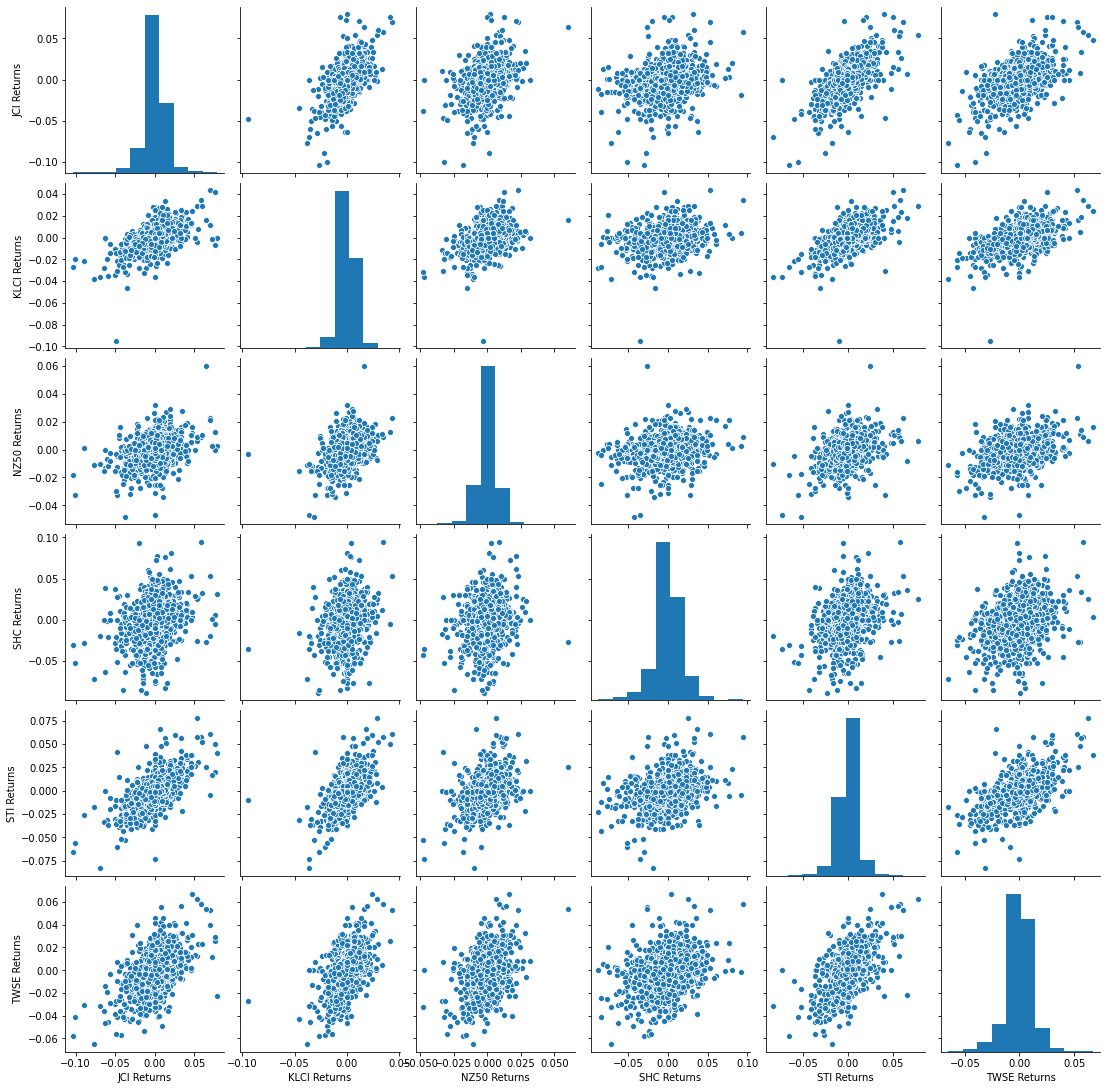

In [13]:
sns.pairplot(returnz)

**Using this returns DataFrame, we investigate the best and worst year for each stock_market**

In [14]:
returnz.idxmin()

JCI Returns    2008-10-08
KLCI Returns   2008-03-10
NZ50 Returns   2008-10-16
SHC Returns    2007-02-27
STI Returns    2008-10-24
TWSE Returns   2008-01-22
dtype: datetime64[ns]

In [15]:
returnz.idxmax()

JCI Returns    2008-01-23
KLCI Returns   2007-08-20
NZ50 Returns   2008-10-14
SHC Returns    2008-09-19
STI Returns    2008-10-30
TWSE Returns   2009-04-30
dtype: datetime64[ns]

**Checking the standard deviation for the returns in each stock market indexes to identify which market is the riskest**

In [16]:
returnz.std()

JCI Returns     0.013953
KLCI Returns    0.007555
NZ50 Returns    0.006995
SHC Returns     0.017294
STI Returns     0.011585
TWSE Returns    0.012198
dtype: float64

*The riskest stock to invest in is the SHC stocks because it's returns standard deviation is the highest. That means there is a lot of fluctuation in their stocks*

In [17]:
returnz.loc['2015-01-01':'2015-12-31'].std()

JCI Returns     0.010583
KLCI Returns    0.006815
NZ50 Returns    0.005201
SHC Returns     0.023701
STI Returns     0.007696
TWSE Returns    0.009317
dtype: float64

**Creating a distplot using seaborn of the 2015 returns for SHC**

<AxesSubplot:xlabel='SHC Returns'>

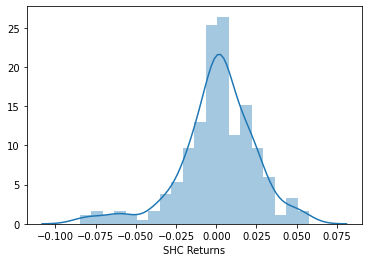

In [18]:
sns.distplot(returnz['SHC Returns'].loc['2015-01-01':'2015-12-31'],bins=20)

**Creating a distplot using seaborn of the 2008 returns for STI**

<AxesSubplot:xlabel='STI Returns'>

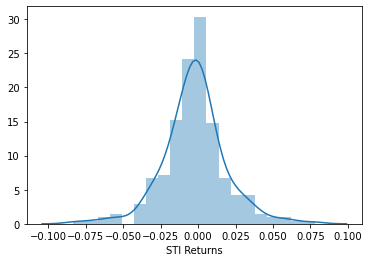

In [19]:
sns.distplot(returnz['STI Returns'].loc['2008-01-01':'2008-12-31'],bins=20)

____
# More Visualization


### Imports

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Create a line plot showing Close price for stock market index company for the entire index of time.**

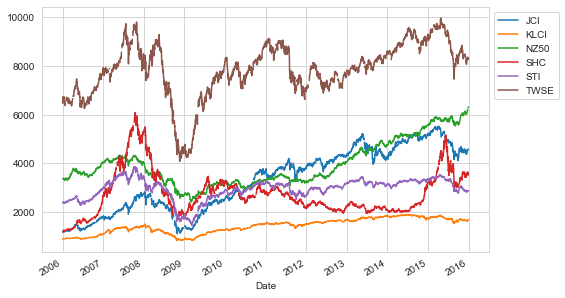

In [21]:
stock_market.xs(key="Close",axis=1,level='Stock Info').plot(figsize=(8,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.8))


## Moving Averages

Analyzing the moving averages for these stocks in the year 2008. 

**Plotting the rolling 30 day average against the Close Price for JCI stock for the year 2008**

<AxesSubplot:xlabel='Date'>

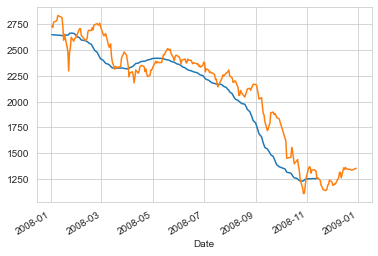

In [22]:
JCI['Close'].loc['2009-01-01':'2008-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
JCI['Close'].loc['2009-01-01':'2008-01-01'].plot(label='JCI CLOSE')


**Creating a heatmap of the correlation between the stocks Close Price.**

In [23]:
new = pd.DataFrame()

In [24]:
for tick in tickers:
    new[tick + 'Close'] = stock_market[tick]['Close']

In [25]:
new

,JCIClose,KLCIClose,NZ50Close,SHCClose,STIClose,TWSEClose
Date,,,,,,
2006-01-02,1171.71,NaN,NaN,NaN,NaN,6462.06
2006-01-03,1184.69,892.85,NaN,NaN,2369.37,6591.77
2006-01-04,1211.70,897.13,3374.46,1180.96,2384.13,6616.44
2006-01-05,1211.00,906.66,3375.98,1197.27,2403.75,6709.87
2006-01-06,1222.25,911.67,3364.97,1209.42,2420.74,6694.82
...,...,...,...,...,...,...
2015-12-25,NaN,NaN,NaN,3627.91,NaN,8363.28
2015-12-28,4557.35,1670.73,NaN,3533.78,2875.32,8358.49
2015-12-29,4569.36,1685.36,6292.44,3563.74,2888.22,8274.69


<AxesSubplot:>

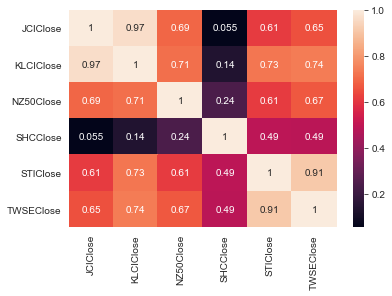

In [26]:
sns.heatmap(new.corr(),annot=True)

**Using seaborn's clustermap to cluster the correlations together:**

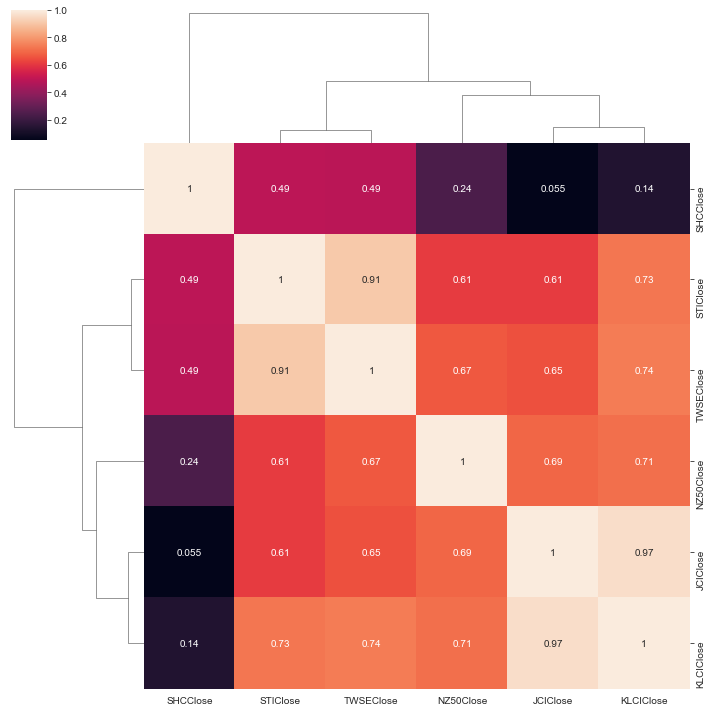

In [27]:
sns.clustermap(new.corr(),annot=True)

## Exploratory Data Analysis  using Ploty and cufflinks

**Using .iplot(kind='candle) to create a candle plot of JCI stock from Jan 1st 2015 to Jan 1st 2016.**

In [28]:
JCI[['Open', 'High', 'Low', 'Close']].loc['2016-01-01':'2015-01-01'].iplot(kind='candle')

**Using .ta_plot(study='sma') to create a Simple Moving Averages plot of STI for the year 2015.**

In [29]:
STI['Close'].loc['2015-12-31':'2015-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Using .ta_plot(study='boll') to create a Bollinger Band Plot for STI for the year 2015.**

In [30]:
STI['Close'].loc['2015-12-31':'2015-01-01'].ta_plot(study='boll')